In [359]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset to python environment

In [360]:
data = pd.read_excel('/content/iris.xls')

In [361]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# checking the basic details of data

In [362]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [363]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [364]:
data.shape

(150, 5)

In [365]:
data.columns


Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [366]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

# Handling the missing value by using SimpleImputer

In [367]:
cols=['SL','SW','PL']

In [368]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
data[cols] = imputer.fit_transform(data[cols])

In [369]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [370]:
data['Classification'].value_counts()

Classification
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

# Convert categorical labels to numerical labels using label encoding

In [371]:
data['Classification'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [372]:
from sklearn.preprocessing import LabelEncoder

In [373]:
label_encoder = LabelEncoder()
data['Classification'] = label_encoder.fit_transform(data['Classification'])

In [374]:
data.head()

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.4,0.2,0
1,4.900000,3.0,1.4,0.2,0
2,5.855944,3.2,1.3,0.2,0
3,4.600000,3.1,1.5,0.2,0
4,5.000000,3.6,1.4,0.2,0


In [375]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              150 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


# Define X and y

In [376]:

y = data['Classification']
X=data.drop(['Classification'],axis=1)

In [377]:
X.shape

(150, 4)

In [378]:
y.shape

(150,)

# Split the data

In [379]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [380]:
X_train.shape

(120, 4)

In [381]:
X_test.shape

(30, 4)

# scaling

In [382]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Logistic regression

In [383]:
from sklearn.linear_model import LogisticRegression
log_model= LogisticRegression()
log_model.fit(X_train,y_train)
y_pred=log_model.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 1,
       0, 2, 2, 2, 2, 2, 0, 0])

In [384]:
from sklearn.metrics import confusion_matrix , accuracy_score ,precision_score , recall_score,f1_score
print('Accuracy is', accuracy_score(y_test, y_pred))
print('Precision is', precision_score(y_test, y_pred,average=None))
print('Recall is', recall_score(y_test, y_pred,average=None))
print('F1 Score is', f1_score(y_test, y_pred,average=None))


Accuracy is 0.9666666666666667
Precision is [1.  0.9 1. ]
Recall is [1.         1.         0.90909091]
F1 Score is [1.         0.94736842 0.95238095]


In [385]:
from sklearn.metrics import confusion_matrix , accuracy_score ,precision_score , recall_score,f1_score
print('Accuracy is', accuracy_score(y_test, y_pred))
print('Precision is', precision_score(y_test, y_pred,average='micro'))
print('Recall is', recall_score(y_test, y_pred,average='micro'))
print('F1 Score is', f1_score(y_test, y_pred,average='micro'))

Accuracy is 0.9666666666666667
Precision is 0.9666666666666667
Recall is 0.9666666666666667
F1 Score is 0.9666666666666667


In [386]:
from sklearn.metrics import confusion_matrix , accuracy_score ,precision_score , recall_score,f1_score
print('Accuracy is', accuracy_score(y_test, y_pred))
print('Precision is', precision_score(y_test, y_pred,average='macro'))
print('Recall is', recall_score(y_test, y_pred,average='macro'))
print('F1 Score is', f1_score(y_test, y_pred,average='macro'))

Accuracy is 0.9666666666666667
Precision is 0.9666666666666667
Recall is 0.9696969696969697
F1 Score is 0.9665831244778613


In [387]:
from sklearn.metrics import confusion_matrix , accuracy_score ,precision_score , recall_score,f1_score
print('Accuracy is', accuracy_score(y_test, y_pred))
print('Precision is', precision_score(y_test, y_pred,average='weighted'))
print('Recall is', recall_score(y_test, y_pred,average='weighted'))
print('F1 Score is', f1_score(y_test, y_pred,average='weighted'))

Accuracy is 0.9666666666666667
Precision is 0.9700000000000001
Recall is 0.9666666666666667
F1 Score is 0.966750208855472


# KNN CLASSIFIER

In [388]:
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(1,15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    metric_k.append(acc)

metric_k

[0.9333333333333333,
 0.9333333333333333,
 1.0,
 0.9333333333333333,
 0.9666666666666667,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667]

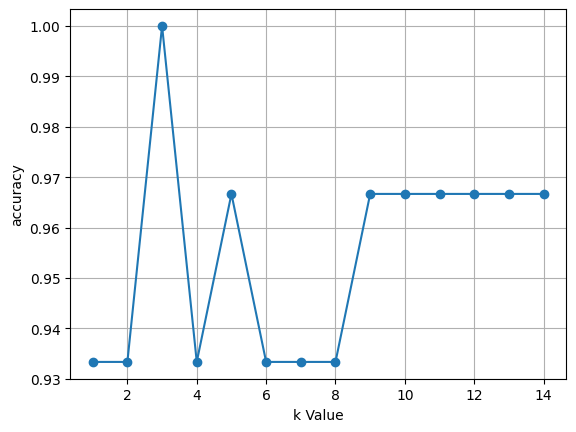

In [389]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k Value')
plt.ylabel('accuracy')
plt.grid()

In [390]:
classifier = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
classifier.fit(X_train,y_train)
y_pred_knn = classifier.predict(X_test)
print('Accuracy is', accuracy_score(y_test, y_pred_knn))
print('Precision is', precision_score(y_test, y_pred_knn,average=None))
print('Recall is', recall_score(y_test, y_pred_knn,average=None))
print('F1 Score is', f1_score(y_test, y_pred_knn,average=None))

Accuracy is 1.0
Precision is [1. 1. 1.]
Recall is [1. 1. 1.]
F1 Score is [1. 1. 1.]


In [391]:
classifier = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
classifier.fit(X_train,y_train)
y_pred_knn = classifier.predict(X_test)
print('Accuracy is', accuracy_score(y_test, y_pred_knn))
print('Precision is', precision_score(y_test, y_pred_knn,average='weighted'))
print('Recall is', recall_score(y_test, y_pred_knn,average='weighted'))
print('F1 Score is', f1_score(y_test, y_pred_knn,average='weighted'))

Accuracy is 1.0
Precision is 1.0
Recall is 1.0
F1 Score is 1.0


In [392]:
classifier = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
classifier.fit(X_train,y_train)
y_pred_knn = classifier.predict(X_test)
print('Accuracy is', accuracy_score(y_test, y_pred_knn))
print('Precision is', precision_score(y_test, y_pred_knn,average='macro'))
print('Recall is', recall_score(y_test, y_pred_knn,average='macro'))
print('F1 Score is', f1_score(y_test, y_pred_knn,average='macro'))

Accuracy is 1.0
Precision is 1.0
Recall is 1.0
F1 Score is 1.0


In [393]:
classifier = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
classifier.fit(X_train,y_train)
y_pred_knn = classifier.predict(X_test)
print('Accuracy is', accuracy_score(y_test, y_pred_knn))
print('Precision is', precision_score(y_test, y_pred_knn,average='micro'))
print('Recall is', recall_score(y_test, y_pred_knn,average='micro'))
print('F1 Score is', f1_score(y_test, y_pred_knn,average='micro'))

Accuracy is 1.0
Precision is 1.0
Recall is 1.0
F1 Score is 1.0


# support vector machine

In [394]:
from sklearn.svm import SVC
svm_clf=SVC(kernel='linear')
svm_clf.fit(X_train,y_train)
y_svm_pred=svm_clf.predict(X_test)

In [395]:
print(confusion_matrix(y_test,y_svm_pred))
print("accuracy score",accuracy_score(y_test,y_svm_pred))
print("precision score", precision_score(y_test,y_svm_pred,average='weighted'))

[[10  0  0]
 [ 0  8  1]
 [ 0  1 10]]
accuracy score 0.9333333333333333
precision score 0.9333333333333333


In [396]:
svm_clf1=SVC(kernel='poly')
svm_clf1.fit(X_train,y_train)
y_svm_pred1=svm_clf1.predict(X_test)

In [397]:
print(confusion_matrix(y_test,y_svm_pred1))
print("accuracy score",accuracy_score(y_test,y_svm_pred1))
print("precision score", precision_score(y_test,y_svm_pred1,average='weighted'))

[[10  0  0]
 [ 0  8  1]
 [ 0  3  8]]
accuracy score 0.8666666666666667
precision score 0.8774410774410775


In [398]:
svm_clf2=SVC(kernel='rbf')
svm_clf2.fit(X_train,y_train)
y_svm_pred2=svm_clf2.predict(X_test)

In [399]:
print(confusion_matrix(y_test,y_svm_pred2))
print("accuracy score",accuracy_score(y_test,y_svm_pred2))
print("precision score", precision_score(y_test,y_svm_pred2,average='weighted'))

[[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]
accuracy score 0.9666666666666667
precision score 0.9700000000000001


# Decision tree classifier

In [400]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier(criterion='entropy')
dt_clf.fit(X_train,y_train)
y_dt_pred=dt_clf.predict(X_test)

In [401]:
print(confusion_matrix(y_test,y_dt_pred))
print("accuracy score is",accuracy_score(y_test,y_dt_pred))
print("precision is",precision_score(y_test,y_dt_pred,average='weighted'))

[[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]
accuracy score is 0.9666666666666667
precision is 0.9700000000000001


# Random forest classifier

In [402]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier()
rf_clf.fit(X_train,y_train)
y_rf_pred=rf_clf.predict(X_test)


In [403]:
print(confusion_matrix(y_test,y_rf_pred))
print("accuracy score",accuracy_score(y_test,y_rf_pred))
print("precision is",precision_score(y_test,y_rf_pred,average='weighted'))

[[10  0  0]
 [ 0  9  0]
 [ 0  1 10]]
accuracy score 0.9666666666666667
precision is 0.9700000000000001


# **Just rewrite the accuracies of all models and find the best model **

In [404]:
accuracy_log=accuracy_score(y_test, y_pred)
accuracy_knn=accuracy_score(y_test, y_pred_knn)
accuracy_svm_li=accuracy_score(y_test,y_svm_pred)
accuracy_svm_pol=accuracy_score(y_test,y_svm_pred1)
accuracy_svm_rbf=accuracy_score(y_test,y_svm_pred2)
accuracy_rf=accuracy_score(y_test,y_rf_pred)
accuracy_dt=accuracy_score(y_test,y_dt_pred)

In [405]:

accuracies = {
    "Logistic Regression": accuracy_log,
     "KNN":accuracy_knn,
    "SVM1":accuracy_svm_li,
    "SVM2": accuracy_svm_pol,
    "SVM3": accuracy_svm_rbf,
    "Decision Tree": accuracy_dt,
    "Random Forest": accuracy_rf
}


print("accuracies",accuracies)


accuracies {'Logistic Regression': 0.9666666666666667, 'KNN': 1.0, 'SVM1': 0.9333333333333333, 'SVM2': 0.8666666666666667, 'SVM3': 0.9666666666666667, 'Decision Tree': 0.9666666666666667, 'Random Forest': 0.9666666666666667}


In [406]:
 #Find the maximum accuracy value
max_accuracy = max(accuracies.values())

# find all models that have the maximum accuracy
best_models = []
for model, accuracy in accuracies.items():
    if accuracy == max_accuracy:
        best_models.append(model)
#finding the best model
print("Best performing model(s):")
for model in best_models:
    print(f"{model} with an accuracy of {max_accuracy:.4f}")

Best performing model(s):
KNN with an accuracy of 1.0000


# ***Here the best models are models using the classifiers KNN classifier and Decision tree classifier,Because which give more accuracy values  and precision values among other models***